# Optical Waveguide Modes

Plot the left- and right-hand sides of the waveguide mode condition to show mode angles

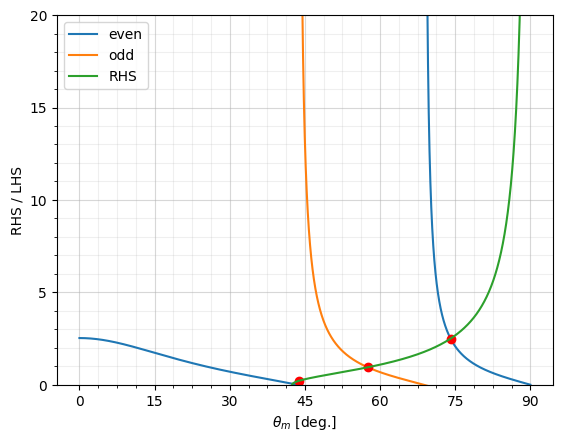

In [1]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import numpy as np
from optical_waveguide import mode_angle, beta, n_sio2
import n_opt
from scipy.constants import c
import matplotlib.pyplot as plt

mode_angle(0.5, plotting=True)

plt.xlabel(r"$\theta_m$ [deg.]")
plt.ylabel(r"RHS / LHS")
plt.ylim((0, 20))

major_ticks_x = np.arange(0, 91, 15)
minor_ticks_x = np.arange(0, 90, 3.75)
major_ticks_y = np.arange(0, 21, 5)
minor_ticks_y = np.arange(0, 20, 1)
plt.xticks(major_ticks_x)
plt.xticks(minor_ticks_x, minor=True)
plt.yticks(major_ticks_y)
plt.yticks(minor_ticks_y, minor=True)
plt.grid(which="minor", alpha=0.2)
plt.grid(which="major", alpha=0.5)
plt.legend()
plt.show()

Plot the group refractive indices for increasing waveguide thickness

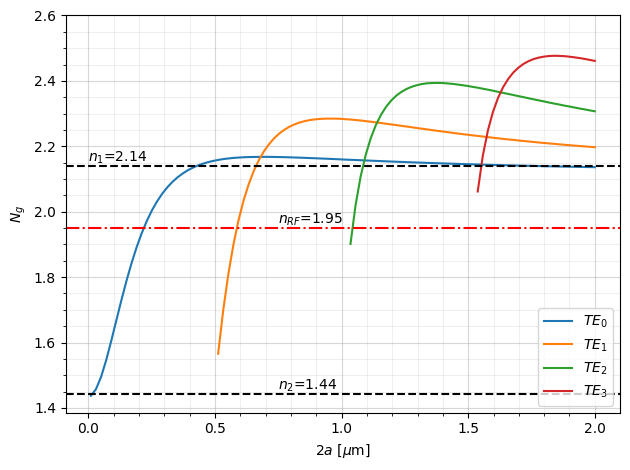

In [2]:
# Calculate the mode angle of the 0-th order mode for waveguide thickness varying from .1 to 1 um, for lambda=1.55um
a = np.linspace(0.005, 1, 100)
n_modes = 4
wlen = 1.55
ang_m = np.array([[np.nan] * n_modes])
for ai in a:
    ang = mode_angle(ai)
    if ang.size < n_modes:
        ang = np.append(
            ang, [np.nan] * (n_modes - ang.size)
        )  # Pad with nan if not all modes exist
    elif ang.size > n_modes:
        ang = ang[:n_modes]
    ang_m = np.vstack((ang_m, ang))
ang_m = np.delete(ang_m, 0, 0)  # Remove dummy first row

# Calculate beta_m for the given range of mode angles, for lambda=1.55um
beta_m = beta(wlen, ang_m)

# Calculate the mode angle for lambda+dl
dl = 0.03
ang_m_dl = np.array([[np.nan] * n_modes])
for ai in a:
    ang_dl = mode_angle(ai, wlen + dl)
    if ang_dl.size < n_modes:
        ang_dl = np.append(
            ang_dl, [np.nan] * (n_modes - ang_dl.size)
        )  # Pad with nan if not all modes exist
    elif ang_dl.size > n_modes:
        ang_dl = ang_dl[:n_modes]
    ang_m_dl = np.vstack((ang_m_dl, ang_dl))
ang_m_dl = np.delete(ang_m_dl, 0, 0)  # Remove dummy first row

# Calculate beta_m for lambda+dl
beta_m_dl = beta(wlen + dl, ang_m_dl)

# Calculate dlambda/dbeta and vg for given range of waveguide thicknesses
dbeta = beta_m_dl - beta_m
dldb = dl / dbeta
vg = np.abs(2 * np.pi * c / np.square(wlen) * dldb)

# Strip bad values (first element of higher order modes)
vg = vg.T
vg[2][np.argwhere(vg[2] > 0)[0][0]] = np.nan
vg[3][np.argwhere(vg[3] > 0)[0][0]] = np.nan
vg = vg.T

# Plotting
n1 = n_opt.n_e(1.55)
n2 = n_sio2(1.55)
n_rf = 1.95

fig, ax = plt.subplots()

for v, l in zip(vg.T, [r"$TE_0$", r"$TE_1$", r"$TE_2$", r"$TE_3$"]):
    ax.plot(2 * a, c / v, label=l)
ax.axhline(n1, linestyle="--", color="black")
ax.axhline(n2, linestyle="--", color="black")
ax.axhline(n_rf, linestyle="-.", color="red")
ax.annotate(
    r"$n_1$={:0.2f}".format(n1),
    xy=(0, n1),
    xytext=(0, 0),
    textcoords="offset points",
    ha="left",
    va="bottom",
)
ax.annotate(
    r"$n_2$={:0.2f}".format(n2),
    xy=(0.75, n2),
    xytext=(0, 0),
    textcoords="offset points",
    ha="left",
    va="bottom",
)
ax.annotate(
    r"$n_{RF}$=1.95",
    xy=(0.75, n_rf),
    xytext=(0, 0),
    textcoords="offset points",
    ha="left",
    va="bottom",
)

ax.set_xlabel(r"$2a$ [$\mu$m]")
ax.set_ylabel(r"$N_g$")
ax.legend(loc=4)

major_ticks_x = np.arange(0, 2.1, 0.5)
minor_ticks_x = np.arange(0, 2.1, 0.1)
major_ticks_y = np.arange(1.4, 2.6, 0.2)
minor_ticks_y = np.arange(1.4, 2.6, 0.05)
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)

plt.tight_layout()
plt.show()